In [1]:
# Внимание!!! Важно, что бы файлы с данными и исполняемый файл находились в одной папке, 
# тогда пути к тестовым и тренировочным наборам будут содержать только имена файлов.
# 
# В пути к тренировочным и тестовым данным запрежается использовать абсалютную адресацию, 
# то есть адресацию, в которой присутствуют имена папок. Путь должен содержать только имя файла.
#
# Напоминание: под моделью машинного обучения понимаются все действия с исходными данными, 
# которые необходимо произвести, что бы сопоставить признаки целевому значению.

### Область работы 1 (библиотеки)

In [2]:
# Данный блок в области 1 выполняется преподавателем
# 
# данный блок предназначен только для подключения необходимых библиотек
# запрещается подключать библиотеки в других блоках
# запрещается скрывать предупреждения системы
# установка дополнительных библиотек размещается прямо здесь (обязательно закоментированы)
# pip install

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display


from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, Normalizer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold, StratifiedShuffleSplit
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, precision_recall_curve
from sklearn.metrics import recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression

### Область работы 2 (выполнение лучшей модели)

In [4]:
# Данный блок(и) в области 2 выполняется преподавателем
#
# В области находится одна, единственная, итоговая модель машинного обучения с однозначными, 
# зафиксированными параметрами
#
# В данной области категорически запрещается искать, выбирать, улучшать, оптимизировать, 
# тюниговать и т.д. модель машинного обучения

In [5]:
# Путь к тренировочному набору
path_train = 'train.csv' # содержит только имя файла, без имен папок
# Путь к тестовому набору
path_test  = 'test.csv' # содержит только имя файла, без имен папок

In [6]:
# Блок(и) обучения и поверки модели
df = pd.read_csv(path_train)
df = df.drop(columns = ['density']) #столбец сильно коррелирует с двумя другими
df.quality = np.where(df.quality>= 7, 1, 0)

## Я выбрал целевую метрику precision. Кажется логичным для нас минимизировать бадягу (т.е. FP), которую мы причислили к хорошим винам, в чем и заключается суть метрики precision

In [7]:

X_train, X_test, y_train, y_test = train_test_split(df.drop(columns = ['quality']).values, df.quality.values, test_size=0.3,
                                                     stratify=df.quality)
pipe = Pipeline([('preprocessing', MinMaxScaler()), 
                 ('clf',           LogisticRegression(penalty='l2', solver='newton-cg', C=0.1))])



pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
precision_score(y_test, y_pred)

0.7578947368421053

In [8]:
# Блок предсказания с использованием тестового набора

In [9]:
df1 = pd.read_csv(path_test)
df1 = df1.drop(columns = ['density']) #это столбец будет приводить к неверным результатам, т.к. имеет сильную корреляцию с двумя другими столбцами

In [10]:
# Название вектора предсказанных значений  y_predict полученого на основании тестового набора
y_predict = pipe.predict(df1.values)

0.7543859649122807

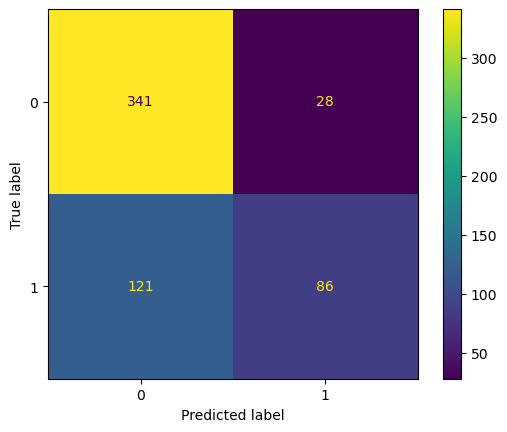

In [11]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score


y_true = np.where(pd.read_csv('test_Y_true.csv').values>=7,1,0)
matrix=confusion_matrix(y_true, y_predict)
ConfusionMatrixDisplay(matrix).plot();
precision_score(y_true, y_predict)